# Práctica 2

Álvaro Huertas García

Sara Dorado Alfaro

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## Estudiar las propiedades de un grafo aleatorio

Usando la función gnp_random_graph(n,p) de NetworkX Implementad una rutina
Python L_C_Aleatorio que devuelva valor promedio de los coeficientes C (índice de
clusterización promedio) y L (camino característico) de un conjunto de n_graph grafos
aleatorios de n nodos y probabilidad p. 

In [2]:
def L_C_Aleatorio(n_graph,n,p):
    mu_C = 0
    mu_L = 0
    for i in range(n_graph):
        G = nx.gnp_random_graph(n, p)
        C = nx.average_clustering(G)
        if nx.is_connected(G):
            L = nx.average_shortest_path_length(G)
        else:
            L = n-1
        mu_C += C/n_graph
        mu_L += L/n_graph
        
    return mu_L, mu_C
            

In [3]:
n = 400
n_graph = 20
ar_p = np.array([0,0.0001,0.0003,0.0006, 0.001,0.003,0.006,0.01,0.03,0.06,0.1,0.3,0.6,1.])

ar_C = np.zeros(len(ar_p))
ar_L = np.zeros(len(ar_p))

for i, p in enumerate(ar_p):
    print('Probabilidad: ', p)
    ar_L[i], ar_C[i] = L_C_Aleatorio(n_graph,n,p)

Probabilidad:  0.0
Probabilidad:  0.0001
Probabilidad:  0.0003
Probabilidad:  0.0006
Probabilidad:  0.001
Probabilidad:  0.003
Probabilidad:  0.006
Probabilidad:  0.01
Probabilidad:  0.03
Probabilidad:  0.06
Probabilidad:  0.1
Probabilidad:  0.3
Probabilidad:  0.6
Probabilidad:  1.0


In [4]:
print('Caminos caracteristicos medios: \n', ar_L)
print('Indices de clusterizacion medios: \n', ar_C)

Caminos caracteristicos medios: 
 [399.         399.         399.         399.         399.
 399.         399.         399.           2.67289975   2.16414536
   1.9164386    1.69985902   1.39964411   1.        ]
Indices de clusterizacion medios: 
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 6.75000000e-04 2.81041667e-03 9.29227092e-03
 3.02723746e-02 6.01843795e-02 9.99790334e-02 3.00201587e-01
 6.00370729e-01 1.00000000e+00]


#### Valor crítico de $p$, demostración

Por un lado, tenemos que $<k> = \frac{2|E|}{|V|}$ y $ |E| = p\frac{|V|(|V|-1)}{2} \;.$ Despejando de las dos ecuaciones, es fácil ver que:

$$<k> \simeq p|V| \;.$$

Para un grafo aleatorio, Erdos y Renyi demostraron que la estructura de clusters de un grafo cambia abruptamente cuando $<k>$ se acerca a $1$. La probabilidad crítica será por tanto:

$$ k\simeq 1 \rightarrow p_c|V| \simeq 1 \rightarrow p_c \simeq \frac{1}{|V|} \;.$$

Para nuestros grafos, que tienen $|V| = 400$ nodos, deberíamos obtener una probabilidad crítica $p_c = \frac{1}{400} = 0.0025$.

In [5]:
pc = 1/n
print('Probabilidad crítica (1/n): ', pc)

Probabilidad crítica (1/n):  0.0025


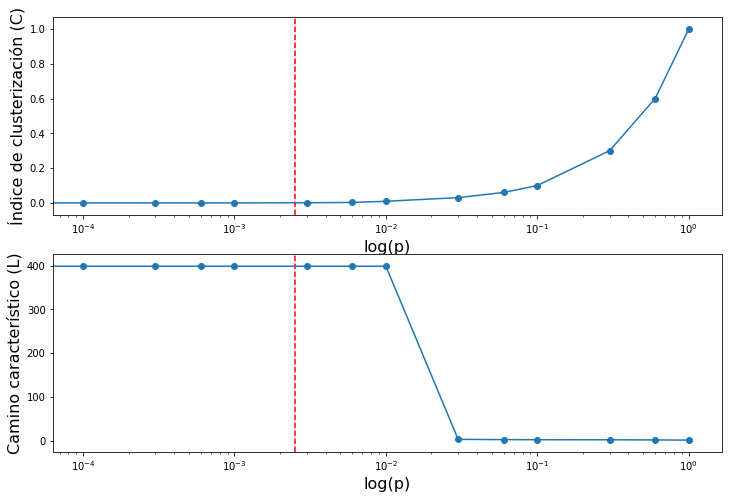

In [6]:
plt.figure(figsize = (12, 8))
plt.subplot(211)
plt.xscale("log", nonposx = 'clip')
plt.ylabel("Índice de clusterización (C)", fontsize = 16)
plt.xlabel("log(p)", fontsize = 16)
plt.axvline(x=pc, color='r', ls='--')
plt.plot(ar_p, ar_C)
plt.scatter(ar_p, ar_C)
plt.subplot(212)
plt.xscale("log", nonposx = 'clip')
plt.ylabel("Camino característico (L)", fontsize = 16)
plt.xlabel("log(p)", fontsize = 16)
plt.axvline(x=pc, color='r', ls='--')
plt.plot(ar_p, ar_L)
plt.scatter(ar_p, ar_L)
plt.show()

En ambos gráficos la probabilidad crítica $p_c$ teórica se muestra con una línea vertical de color rojo. Observaciones:

* El camino característico se mantiene en (N-1) para los primeros valores de $p$. Esto es porque todavía no obtenemos un grafo conexo y el camino característico es, por tanto, infinito. No obstante, cuando empieza a ser conexo el camino caracteŕistico cae según añadimos nuevas aristas en el grafo. 

* Tiene sentido que en ambas gráficas cambien su tendencia en ese punto, porque a medida que crece la C el camino característico entre nodos disminuye; están más conectados, y el índice de clusterización aumenta.

# Apartado 2

Usando la función de NetworkX watts_strogatz_graph(n, k, p) implementad una
rutina Python L_C_small_world(n_graph, n,k,p) que devuelva valor promedio de los
coeficientes C (índice de clusterización promedio) y L (camino característico) para
un conjunto de n_graph grafos de tipo Small World. 

In [7]:
def L_C_Small_World(n_graph,n,k,p):
    mu_C = 0
    mu_L = 0
    for i in range(n_graph):
        G = nx.watts_strogatz_graph(n, k, p)
        C = nx.average_clustering(G)
        if nx.is_connected(G):
            L = nx.average_shortest_path_length(G)
        else:
            L = n-1
        mu_C += C/n_graph
        mu_L += L/n_graph
        
    return mu_L, mu_C

In [8]:
n = 400
n_graph = 20
k = 8
ar_p = np.array([0,0.0001,0.0003,0.0006, 0.001,0.003,0.006,0.01,0.03,0.06,0.1,0.3,0.6,1.])

ar_C = np.zeros(len(ar_p))
ar_L = np.zeros(len(ar_p))

for i, p in enumerate(ar_p):
    print('Probabilidad: ', p)
    ar_L[i], ar_C[i] = L_C_Small_World(n_graph, n, k, p)

Probabilidad:  0.0
Probabilidad:  0.0001
Probabilidad:  0.0003
Probabilidad:  0.0006
Probabilidad:  0.001
Probabilidad:  0.003
Probabilidad:  0.006
Probabilidad:  0.01
Probabilidad:  0.03
Probabilidad:  0.06
Probabilidad:  0.1
Probabilidad:  0.3
Probabilidad:  0.6
Probabilidad:  1.0


Para un grafo de mundo pequeño se comprueba que el camino característico disminuye bruscamente (cambio de régimen) para el valor teórico: 

$$p = \frac{1}{k|V|} \;.$$ 

En nuestro caso, para $k=8$ y $|V| = 400$, tendríamos que la probabilidad crítica

$$ p_c = \frac{1}{8\times 400} = 0.0003 \;.$$

In [9]:
pc = 1/(k*n)
print('Probabilidad crítica (1/(k*n)): ', pc)

Probabilidad crítica (1/(k*n)):  0.0003125


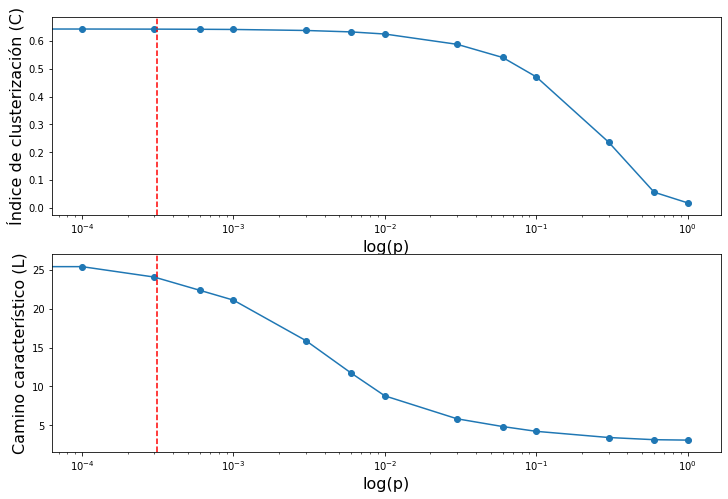

In [10]:
plt.figure(figsize = (12, 8))
plt.subplot(211)
plt.xscale("log", nonposx = 'clip')
plt.ylabel("Índice de clusterización (C)", fontsize = 16)
plt.xlabel("log(p)", fontsize = 16)
plt.axvline(x=pc, color='r', ls='--')
plt.plot(ar_p, ar_C)
plt.scatter(ar_p, ar_C)
plt.subplot(212)
plt.xscale("log", nonposx = 'clip')
plt.ylabel("Camino característico (L)", fontsize = 16)
plt.xlabel("log(p)", fontsize = 16)
plt.axvline(x=pc, color='r', ls='--')
plt.plot(ar_p, ar_L)
plt.scatter(ar_p, ar_L)
plt.show()

En ambos gráficos hemos señalado la probabilidad crítica teórica $p_c$ con una línea vertical de color rojo. Obervaciones:

* La probabilidad crítica teórica $p_c$ para el camino característico se corresponde a la obtenida con los resultados empíricos, ya que marca un cambio de tendencia en la gráfica obtenida para el camino característico $L$.

* A medida que aumenta la probabilidad de reconectar una arista observamos que el índice de clusterización disminuye. En un watts_strogatz los nodos se unen con sus k vecinos. Por lo tanto, a medida que se reconectan aristas esta propiedad se diluye y el índice de cluterización se comporta en mayor medida como un grafo aleatorio. 

# Apartado 3

Generar una red libre de escala con 10000 nodos y que añade 10 nodos en cada paso (utilizad la rutina barabasi_albert_graph(n, m)). Calculad los valores de L, C y la distribución de grado de los nodos. Generad una red aleatoria que tenga el mismo número de nodos y ramas que la red que habéis creado, calculad sus valores de L, C y la distribución del grado de los nodos y comparad los valores obtenidos.

In [11]:
#Creamos la red libre de escala
n = 10000
m = 10
G_BA = nx.barabasi_albert_graph(n, m)
nx.write_edgelist(G_BA, 'barabasi_albert.txt')

print(nx.info(G_BA))

Name: 
Type: Graph
Number of nodes: 10000
Number of edges: 99900
Average degree:  19.9800


In [12]:
#L y C
C = nx.average_clustering(G_BA)
L = nx.average_shortest_path_length(G_BA)

print("Camino caracteristico red libre de escala: ", L)
print("Indice clusterizacion red libre de escala: ", C)

Camino caracteristico red libre de escala:  3.058794899489949
Indice clusterizacion red libre de escala:  0.011129621571113543


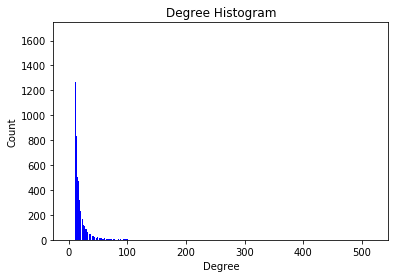

Grado medio red libre de escala:  19.98


In [13]:
dh=nx.degree_histogram(G_BA)
plt.bar(range(len(dh)),dh, width=0.80, color='b')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()
print('Grado medio red libre de escala: ',np.mean(list(dict(nx.degree(G_BA)).values())))

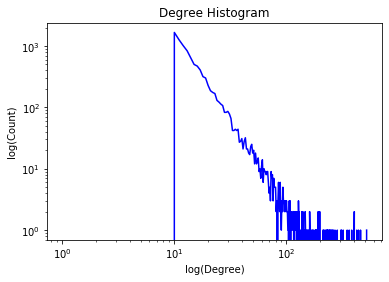

In [14]:
plt.plot(range(len(dh)),dh, color='b')
plt.title("Degree Histogram")
plt.ylabel("log(Count)")
plt.xlabel("log(Degree)")
plt.xscale("log", nonposx = 'clip')
plt.yscale("log", nonposy = 'clip')
plt.show()

##### Comparación con grafos aleatorios.

Primero realizamos una comparación con un único grafo aleatorio generado con la función gnm_random_graph, donde estudiaremos $L$, $C$ y la distribución de grados. 

Después utilizamos la función del apartado 1 de esta práctica, para comparar con valores más robustos en grafos aleatorios de $L$ y $C$.

In [16]:
# Vemos el numero de ramas que tiene el grafo barabasi 
# En la info hemos visto que son 99900
e_al = 99900 #from info
G_AL = nx.gnm_random_graph(n, e_al) 
nx.write_edgelist(G_AL, 'aleatorio.txt')
print(nx.info(G_AL))

Name: 
Type: Graph
Number of nodes: 10000
Number of edges: 99900
Average degree:  19.9800


In [17]:
C = nx.average_clustering(G_AL)
L = nx.average_shortest_path_length(G_AL)

print("Camino caracteristico red aleatoria: ", L)
print("Indice clusterizacion red aleatoria: ", C)

Camino caracteristico red aleatoria:  3.4037628362836285
Indice clusterizacion red aleatoria:  0.0020419920702913407


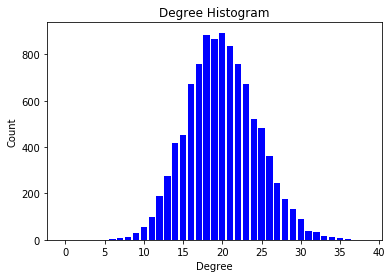

Grado medio del grafo aleatorio:  19.98


In [18]:
dh=nx.degree_histogram(G_AL)
plt.bar(range(len(dh)),dh, width=0.80, color='b')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()
print('Grado medio del grafo aleatorio: ', np.mean(list(dict(nx.degree(G_AL)).values())))

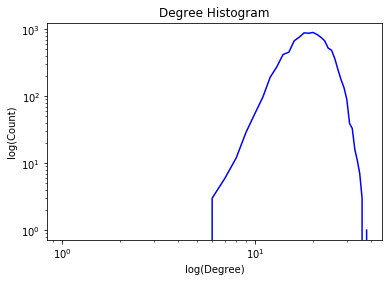

In [19]:
plt.plot(range(len(dh)),dh, color='b')
plt.title("Degree Histogram")
plt.ylabel("log(Count)")
plt.xlabel("log(Degree)")
plt.xscale("log", nonposx = 'clip')
plt.yscale("log", nonposy = 'clip')
plt.show()

Para comparar la red libre de escala con una red aleatoria es interesante usar la función del **apartado 1**. Para ello necesitamos calcular la probabilidad $p$ de generar una arista entre dos nodos en un grafo aleatorio. Sabemos que nuestra red libre de escala tiene:
* Número de nodos |V| = 10000
* Número de aristas |E| = 99900 (ver info de G_BA)

Con la ecuación:

$$|E| = p\frac{|V|(|V|-1)}{2}$$ 

Podemos despejar $p$, obteniendo:

$$p = \frac{2|E|}{|V|(|V|-1)} = 0.01998$$

In [20]:
#Con la funcion del apartado 1
n_graph = 3
p = (2*e_al) / (n*(n-1))
print("Probabilidad p aleatoria: ", p)

mu_L, mu_C = L_C_Aleatorio(n_graph,n,p)

print("Camino caracteristico en %d redes aleatorias: "%n_graph, mu_L)
print("Indice clusterizacion en %d redes aleatorias: "%n_graph, mu_C)

Probabilidad p aleatoria:  0.001998199819981998
Camino caracteristico en 3 redes aleatorias:  3.406996086275295
Indice clusterizacion en 3 redes aleatorias:  0.0019924901216243113


Como indica la teoría, tanto el camino característico como el índice de clusterización es muy similar entre grafos aleatorios y redes libre de escala. Observando los valores obtenidos para $3$ redes aleatorias con el mismo número de nodos y aristas que nuestra red libre de escala, simplemente observamos que el camino característico es ligeramente menor en la red libre de escala ($xxxx$ vs $yyyy$). Lo mismo ocurre para el índice de clusterización, que es ligeramente superior en la red libre de escala ($xxxx$ vs $yyyy$). La gran diferencia está en la distribución de grados:

* La red aleatoria tiene una distribución de grados que sigue una Poisson, como podemos observar claramente en el histograma generado para este tipo de grafos.
* Sin embargo, en una red libre de escala la distribución de grados sigue una ley de potencias. Por eso, al pintarlo en escala logarítmica, aparece una recta. 